<a href="https://colab.research.google.com/github/RobLins12/Sistema-Fuzzy/blob/main/Sistema_Nebuloso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema fuzzy feito por Gabrielle e Robson



**Sobre o sistema em lógica fuzzy:**

Na universidade, foi proposto um novo sistema para avaliar o desempenho de estudantes baseado em Lógica Fuzzy. O sistema proposto trabalha com imprecisões,permitindo a utilização de variáveis linguísticas tais como: bom, ruim e normal. A teoria Fuzzy fornece subsídios para que estas variáveis resultem em números. Este sistema objetiva agrupar o desempenho em avaliações teóricas, contemplando diversas categorias de avaliações, como: avaliações diagnósticas, processuais, formativas, entre outras. Além disso, possibilita considerar diversos tipos de atividades, como: exercícios em sala de aula, tarefas extra-aula, pesquisas, postura frente ao conhecimento, comportamento dos alunos durante o processo de ensino/aprendizagem.

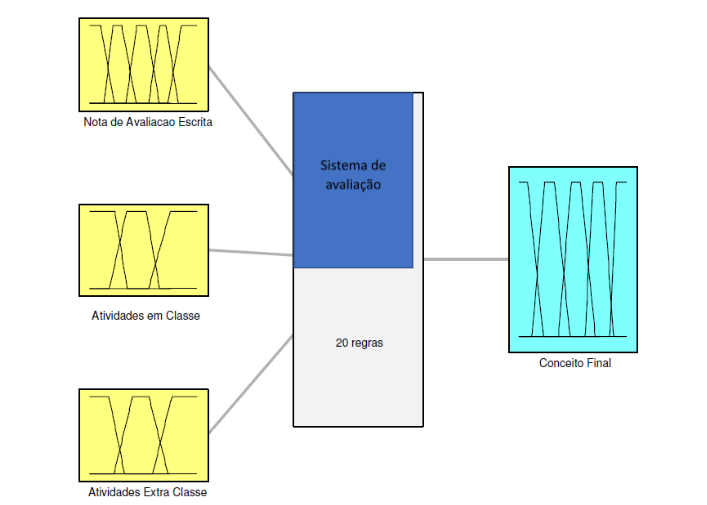

Instalar o módulo scikit-fuzzy:

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=a1bcfe90b7fc3ab49011f090dd3b50e42996f5664e5afd820576f365bfee1daa
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Importar os módulos necessários:

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.fuzzymath import interp_membership

Construir o modelo:

In [ ]:
# Definir andecedentes e consequentes, bem como os domínios das funções de pertinência
test = ctrl.Antecedent(np.arange(0, 11.01, .01), 'test') # Domínio/Rótulo
extraClass = ctrl.Antecedent(np.arange(0, 11.01, .01), 'extraClass')
classAtv = ctrl.Antecedent(np.arange(0, 11.01, .01), 'classAtv')
final = ctrl.Consequent(np.arange(0, 11.01, .01), 'final')

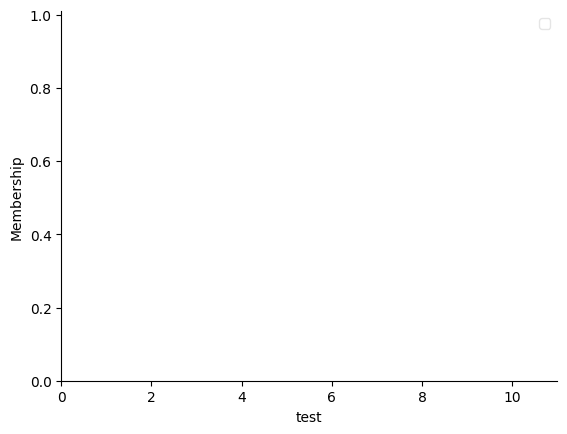

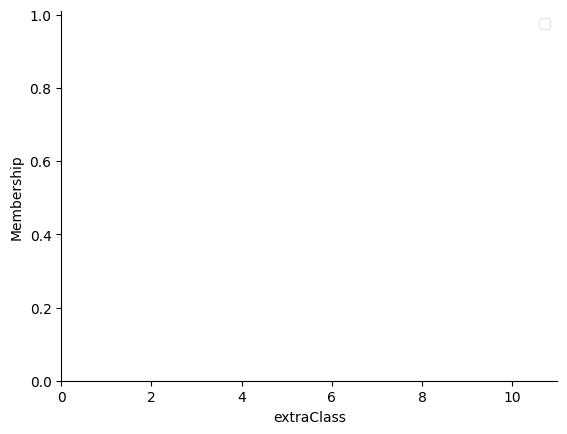

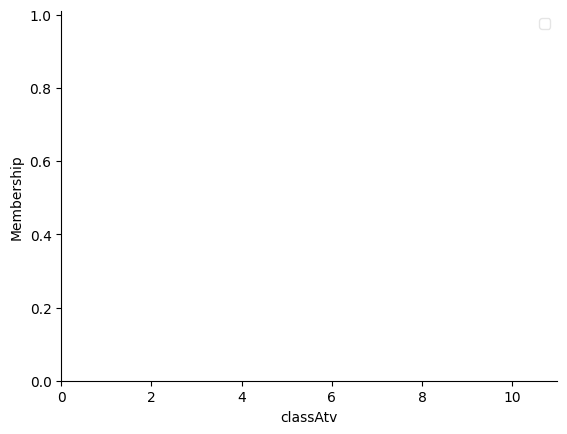

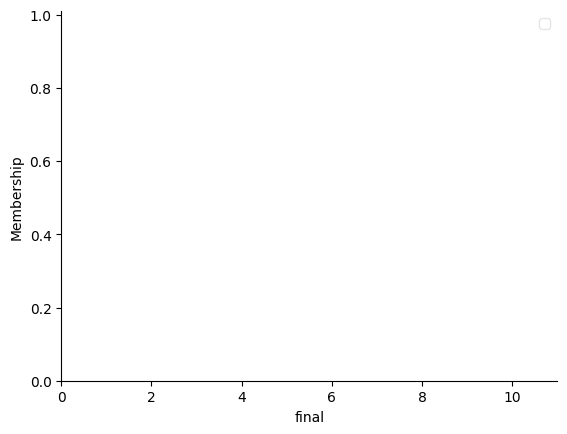

In [ ]:
# Visualizar antecedentes e consequentes definidos, ainda sem uma função de pertinência
test.view()
extraClass.view()
classAtv.view()
final.view()

In [ ]:
# Definir as funções de pertinência para os antecedentes e consequentes

# Antecedentes

test['Insuficiente'] = fuzz.trapmf(test.universe, [0, 0, 1, 2.2])
test['Regular'] = fuzz.trapmf(test.universe, [1.2, 2, 3, 4.2])
test['Bom'] = fuzz.trapmf(test.universe, [3.2, 4.2, 5.5, 6.5])
test['Muito bom'] = fuzz.trapmf(test.universe, [5.5, 6.2, 7.3, 8.4])
test['Excelente'] = fuzz.trapmf(test.universe, [7.2, 8.5, 10, 10])

extraClass['Insuficiente'] = fuzz.trapmf(extraClass.universe, [0, 0, 2, 3.2])
extraClass['Satisfatório'] = fuzz.trapmf(extraClass.universe, [2.2, 3.8, 5.5, 7.3])
extraClass['Excelente'] = fuzz.trapmf(extraClass.universe, [6, 7.5, 10, 10])

classAtv['Insuficiente'] = fuzz.trapmf(classAtv.universe, [0, 0, 2.2, 3.5])
classAtv['Satisfatório'] = fuzz.trapmf(classAtv.universe, [1.8, 3.5, 5.2, 6.5])
classAtv['Excelente'] = fuzz.trapmf(classAtv.universe, [5.5, 7.2, 10, 10])

# Consequentes

final['Insuficiente'] = fuzz.trapmf(final.universe, [0, 0, 1, 2.2])
final['Regular'] = fuzz.trapmf(final.universe, [1.2, 2.2, 3.3, 4.7])
final['Bom'] = fuzz.trapmf(final.universe, [3.8, 4.8, 5.8, 7.1])
final['Muito bom'] = fuzz.trapmf(final.universe, [6, 7, 8, 8.8])
final['Excelente'] = fuzz.trapmf(final.universe, [8.3, 9, 10, 10])

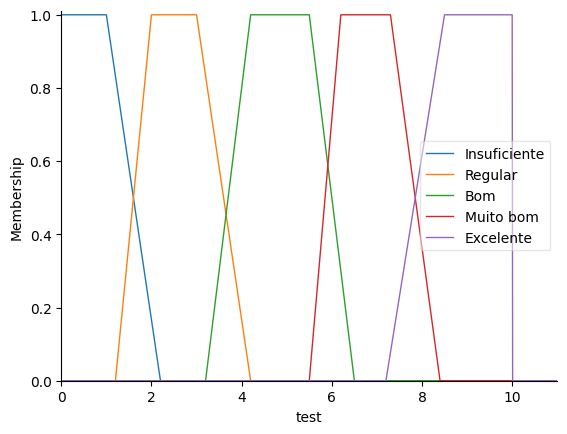

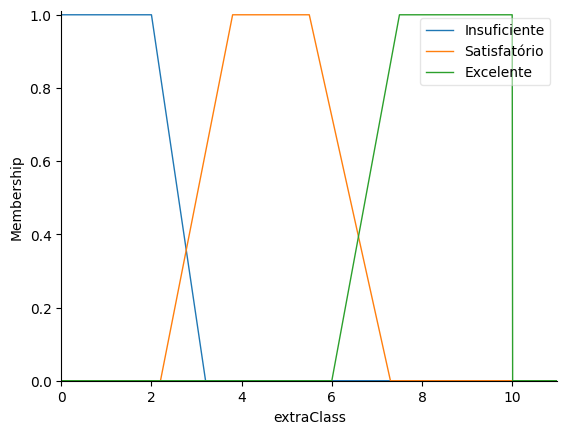

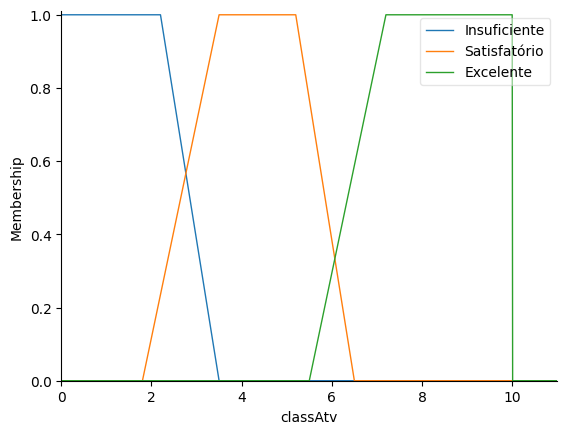

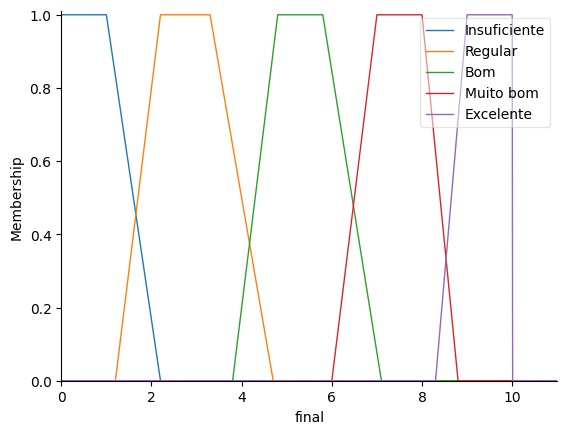

In [ ]:
# Visualizar funções de pertinência

test.view()

extraClass.view()

classAtv.view()

final.view()

In [ ]:
# Para chegar os valores de pertinência de diferentes funções
print('Insuficiente: ', interp_membership(test.universe, test['Insuficiente'].mf, 5))
print('Regular: ', interp_membership(test.universe, test['Regular'].mf, 5))
print('Bom: ', interp_membership(test.universe, test['Bom'].mf, 5))
print('Muito Bom: ', interp_membership(test.universe, test['Muito bom'].mf, 5))
print('Excelente: ', interp_membership(test.universe, test['Excelente'].mf, 5))

Insuficiente:  0.0
Regular:  0.0
Bom:  1.0
Muito Bom:  0.0
Excelente:  0.0


In [ ]:
# Definição das regras
rule1 = ctrl.Rule(test['Insuficiente'] & classAtv['Insuficiente'] & extraClass['Insuficiente'], final['Insuficiente'])
rule2 = ctrl.Rule(test['Insuficiente'] & classAtv['Insuficiente'] & (~extraClass['Insuficiente']), final['Regular'])
rule3 = ctrl.Rule(test['Insuficiente'] & (~classAtv['Insuficiente']) & extraClass['Insuficiente'], final['Regular'])
rule4 = ctrl.Rule(test['Insuficiente'] & (~classAtv['Insuficiente']) & (~extraClass['Insuficiente']), final['Regular'])
rule5 = ctrl.Rule(test['Regular'] & classAtv['Insuficiente'] & extraClass['Insuficiente'], final['Insuficiente'])
rule6 = ctrl.Rule(test['Regular'] & (~classAtv['Insuficiente']) & extraClass['Insuficiente'], final['Regular'])
rule7 = ctrl.Rule(test['Regular'] & classAtv['Insuficiente'] & (~extraClass['Insuficiente']), final['Bom'])
rule8 = ctrl.Rule(test['Regular'] & (~classAtv['Insuficiente']) & (~extraClass['Insuficiente']), final['Bom'])
rule9 = ctrl.Rule(test['Bom'] & classAtv['Insuficiente'] & extraClass['Insuficiente'], final['Regular'])
rule10 = ctrl.Rule(test['Bom'] & classAtv['Insuficiente'] & (~extraClass['Insuficiente']), final['Bom'])
rule11 = ctrl.Rule(test['Bom'] & (~classAtv['Insuficiente']) & extraClass['Insuficiente'], final['Bom'])
rule12 = ctrl.Rule(test['Bom'] & (~classAtv['Insuficiente']) & (~extraClass['Insuficiente']), final['Muito bom'])
rule13 = ctrl.Rule(test['Muito bom'] & classAtv['Insuficiente'] & extraClass['Insuficiente'], final['Bom'])
rule14 = ctrl.Rule(test['Muito bom'] & (~classAtv['Insuficiente']) & extraClass['Insuficiente'], final['Bom'])
rule15 = ctrl.Rule(test['Muito bom'] & classAtv['Insuficiente'] & (~extraClass['Insuficiente']), final['Bom'])
rule16 = ctrl.Rule(test['Muito bom'] & (~classAtv['Insuficiente']) & (~extraClass['Insuficiente']), final['Muito bom'])
rule17 = ctrl.Rule(test['Excelente'] & classAtv['Insuficiente'] & extraClass['Insuficiente'], final['Muito bom'])
rule18 = ctrl.Rule(test['Excelente'] & (~classAtv['Insuficiente']) & (~extraClass['Insuficiente']), final['Excelente'])
rule19 = ctrl.Rule(test['Excelente'] & (~classAtv['Insuficiente']) & extraClass['Insuficiente'], final['Muito bom'])
rule20 = ctrl.Rule(test['Excelente'] & classAtv['Insuficiente'] & (~extraClass['Insuficiente']), final['Muito bom'])


print('Regra 1: ', rule1)
print('\nRegra 2: ', rule2)
print('\nRegra 3: ', rule3)
print('\nRegra 4: ', rule4)
print('\nRegra 5: ', rule5)
print('\nRegra 6: ', rule6)
print('\nRegra 7: ', rule7)
print('\nRegra 8: ', rule8)
print('\nRegra 9: ', rule9)
print('\nRegra 10: ', rule10)
print('\nRegra 11: ', rule11)
print('\nRegra 12: ', rule12)
print('\nRegra 13: ', rule13)
print('\nRegra 14: ', rule14)
print('\nRegra 15: ', rule15)
print('\nRegra 16: ', rule16)
print('\nRegra 17: ', rule17)
print('\nRegra 18: ', rule18)
print('\nRegra 19: ', rule19)
print('\nRegra 20: ', rule20)

Regra 1:  IF (test[Insuficiente] AND classAtv[Insuficiente]) AND extraClass[Insuficiente] THEN final[Insuficiente]
	AND aggregation function : fmin
	OR aggregation function  : fmax

Regra 2:  IF (test[Insuficiente] AND classAtv[Insuficiente]) AND (NOT-extraClass[Insuficiente]) THEN final[Regular]
	AND aggregation function : fmin
	OR aggregation function  : fmax

Regra 3:  IF (test[Insuficiente] AND (NOT-classAtv[Insuficiente])) AND extraClass[Insuficiente] THEN final[Regular]
	AND aggregation function : fmin
	OR aggregation function  : fmax

Regra 4:  IF (test[Insuficiente] AND (NOT-classAtv[Insuficiente])) AND (NOT-extraClass[Insuficiente]) THEN final[Regular]
	AND aggregation function : fmin
	OR aggregation function  : fmax

Regra 5:  IF (test[Regular] AND classAtv[Insuficiente]) AND extraClass[Insuficiente] THEN final[Insuficiente]
	AND aggregation function : fmin
	OR aggregation function  : fmax

Regra 6:  IF (test[Regular] AND (NOT-classAtv[Insuficiente])) AND extraClass[Insuficie

In [ ]:
# Definindo o modelo propriamente dito (Implementa de uma vez os processos de fuzzyficação, a inferência, a defuzzyficação, etc.)
grades_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
grades = ctrl.ControlSystemSimulation(grades_ctrl)

Utilizando o modelo para estimar o resultado de cada aluno


**Aluno 1 - João Paulo**


Indice fuzzy:  0.8375000000000004

Indice clássico:  1.6666666666666667


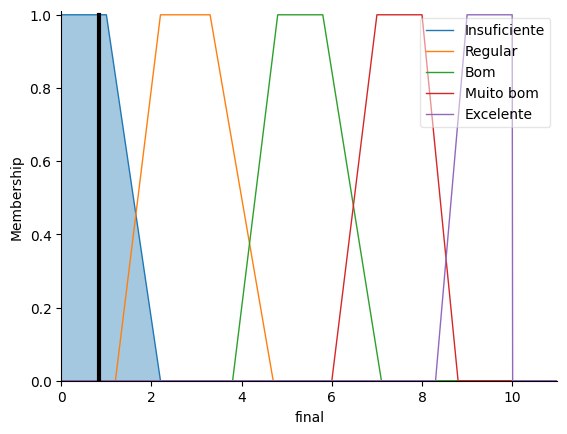

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 2
grades.input['extraClass'] = 2
grades.input['classAtv'] = 1

results = results(2, 1, 2)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 2 - Maria Georgia**


Indice fuzzy:  2.8965277777777767

Indice clássico:  2.8333333333333335


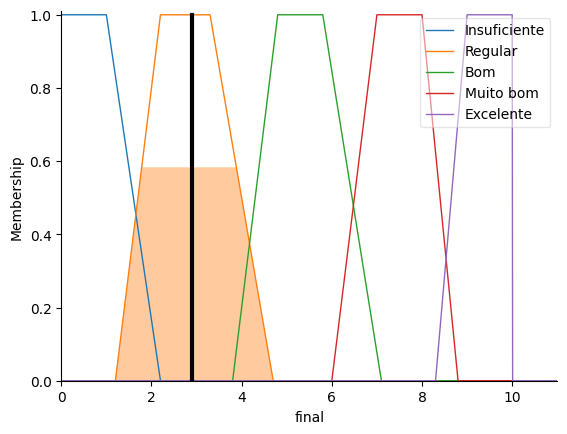

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 1.5
grades.input['extraClass'] = 1
grades.input['classAtv'] = 6

results = results(1.5, 6, 1)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 3 - José Guilherme**


Indice fuzzy:  6.992626247150969

Indice clássico:  5.5


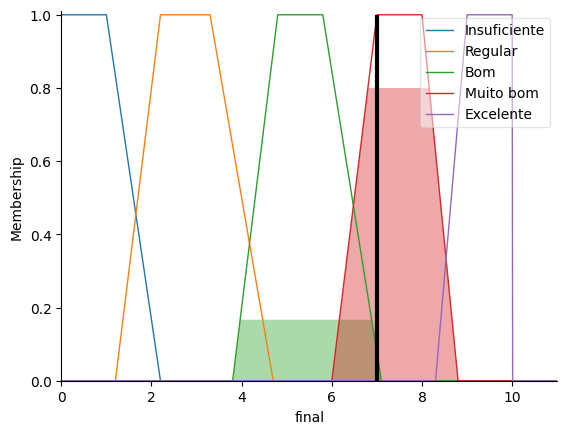

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 4
grades.input['extraClass'] = 7.5
grades.input['classAtv'] = 5

results = results(4, 5, 7.5)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 4 - Jucilene Arruda**


Indice fuzzy:  5.388372093023253

Indice clássico:  5.166666666666667


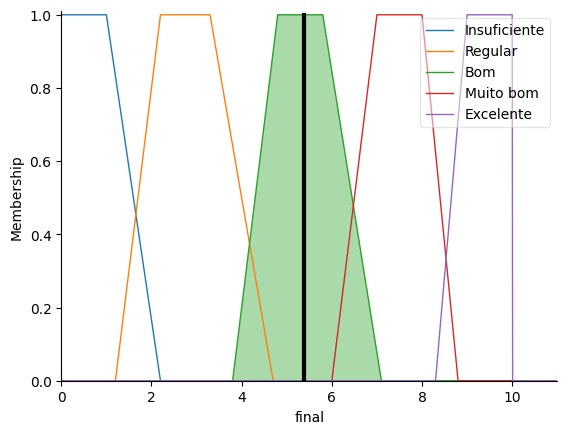

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 5.5
grades.input['extraClass'] = 8
grades.input['classAtv'] = 2

results = results(5.5, 2, 8)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 5 - Yasmin Ellen**


Indice fuzzy:  5.388372093023253

Indice clássico:  5.1000000000000005


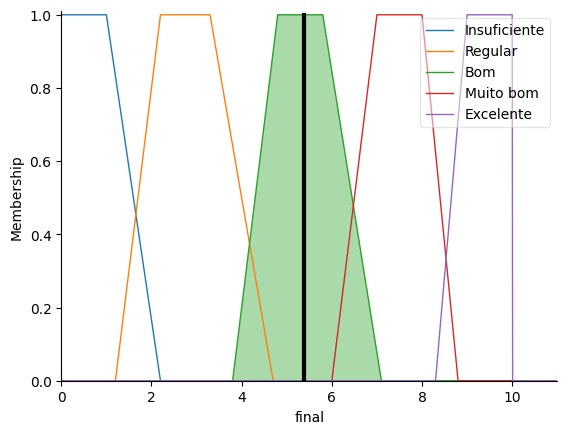

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 6.8
grades.input['extraClass'] = 1.5
grades.input['classAtv'] = 7

results = results(6.8, 7, 1.5)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 6 - Robson Lins**


Indice fuzzy:  5.3960260972716485

Indice clássico:  3.8333333333333335


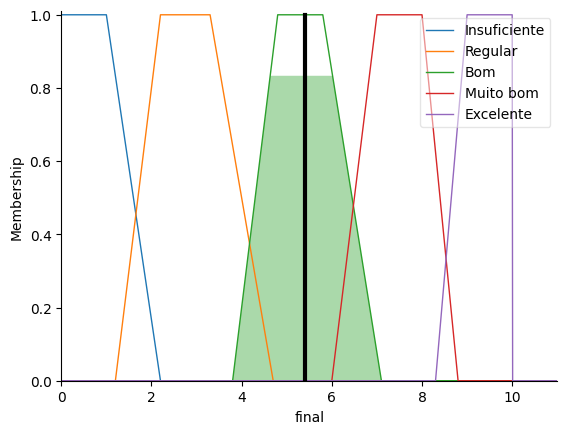

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 7
grades.input['extraClass'] = 3
grades.input['classAtv'] = 1.5

results = results(7, 1.5, 3)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 7 - Gabrielle Rodrigues**


Indice fuzzy:  7.299135604754494

Indice clássico:  5.233333333333333


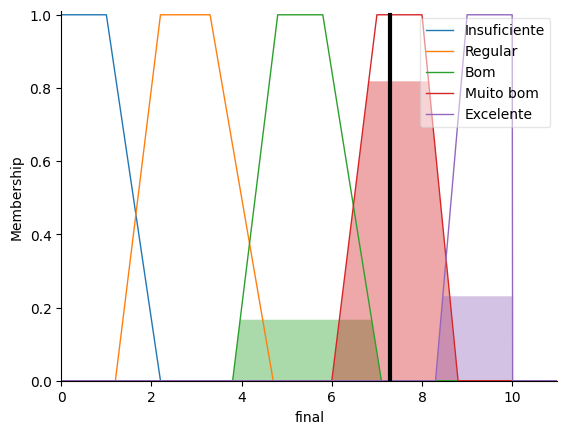

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 7.5
grades.input['extraClass'] = 3
grades.input['classAtv'] = 5.2

results = results(7.5, 5.2, 3)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 8 - Jéssica Eduarda**



Indice fuzzy:  3.935339969807667

Indice clássico:  3.1666666666666665


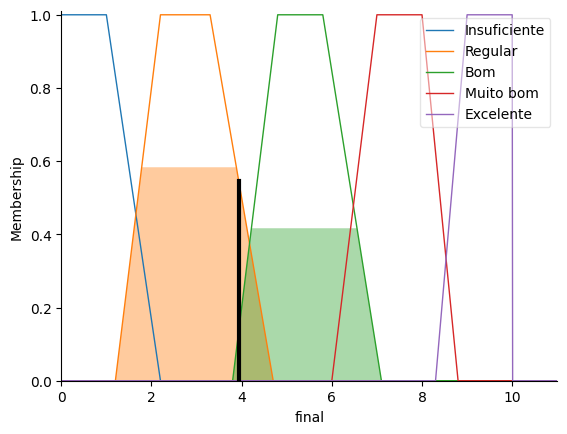

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 5
grades.input['extraClass'] = 2.5
grades.input['classAtv'] = 2

results = results(5, 2, 2.5)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 9 - Cesar Gabriel**


Indice fuzzy:  7.442105263157895

Indice clássico:  3.8333333333333335


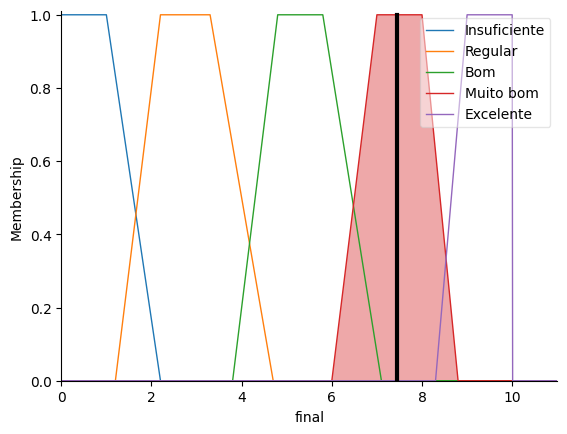

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 8.5
grades.input['extraClass'] = 2
grades.input['classAtv'] = 1

results = results(8.5, 1, 2)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 10 - Thiago Albuquerque**


Indice fuzzy:  8.5107276950612

Indice clássico:  7.033333333333334


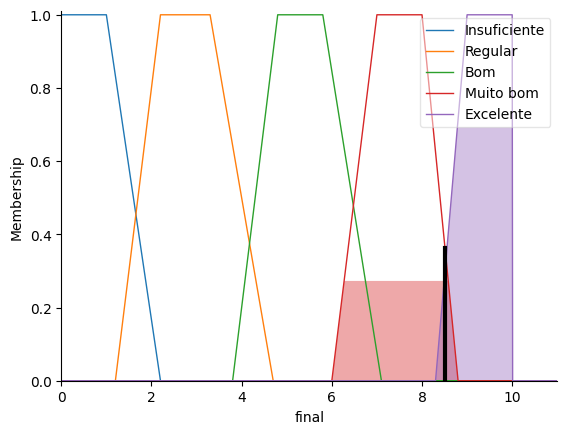

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 8.1
grades.input['extraClass'] = 4
grades.input['classAtv'] = 9

results = results(8.1, 9, 4)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 11 - Jorge Emanuel**


Indice fuzzy:  0.8375000000000004

Indice clássico:  2.066666666666667


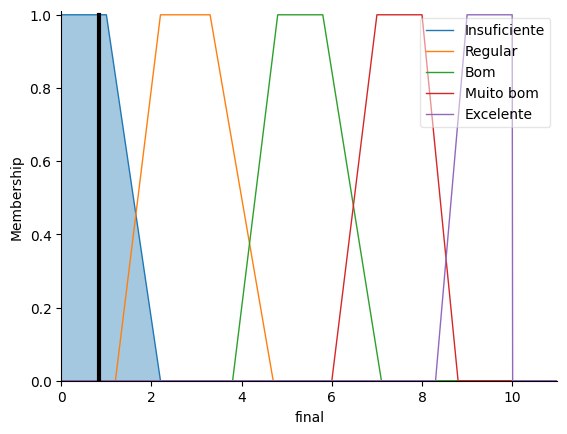

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 3
grades.input['extraClass'] = 1.7
grades.input['classAtv'] = 1.5

results = results(3, 1.5, 1.7)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 12 - Murilo Cavalcanti**


Indice fuzzy:  7.442105263157895

Indice clássico:  4.966666666666667


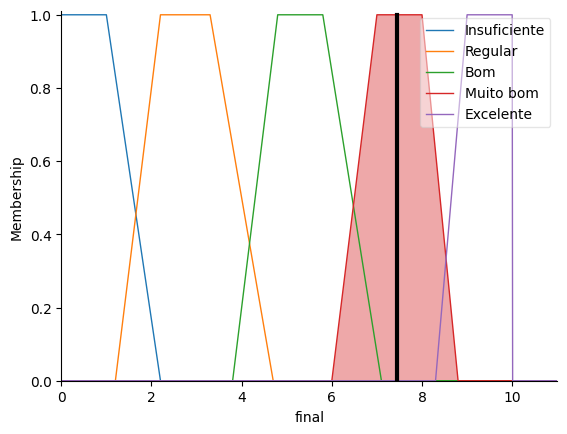

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 10
grades.input['extraClass'] = 1
grades.input['classAtv'] = 3.9

results = results(10, 3.9, 1)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 13 - Samya Nunes**


Indice fuzzy:  4.917845366495427

Indice clássico:  3.6666666666666665


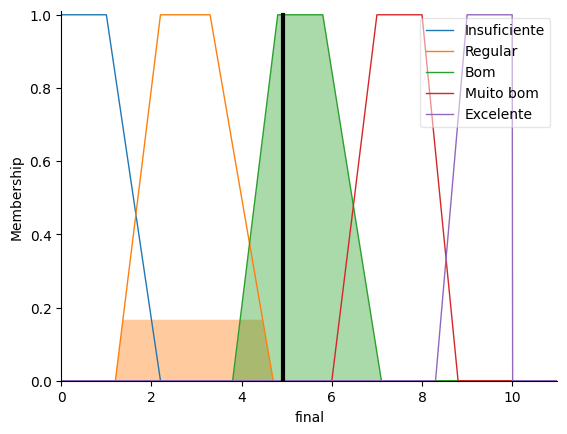

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 2
grades.input['extraClass'] = 7
grades.input['classAtv'] = 2

results = results(2, 2, 7)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 14 - Alice Lins**


Indice fuzzy:  2.8673913043478274

Indice clássico:  2.3333333333333335


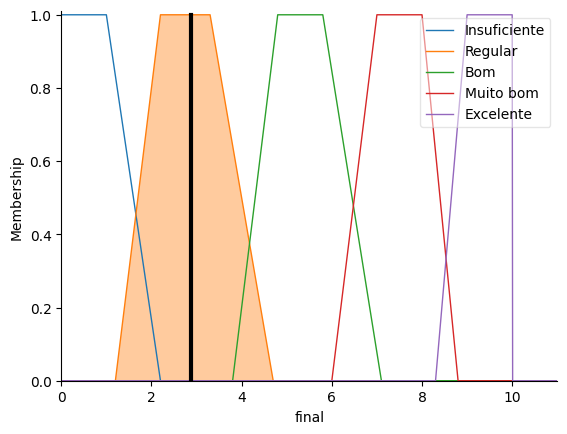

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 1
grades.input['extraClass'] = 1
grades.input['classAtv'] = 5

results = results(1, 5, 1)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)

**Aluno 15 - Giovanne Roberto**


Indice fuzzy:  3.935339969807667

Indice clássico:  2.8666666666666667


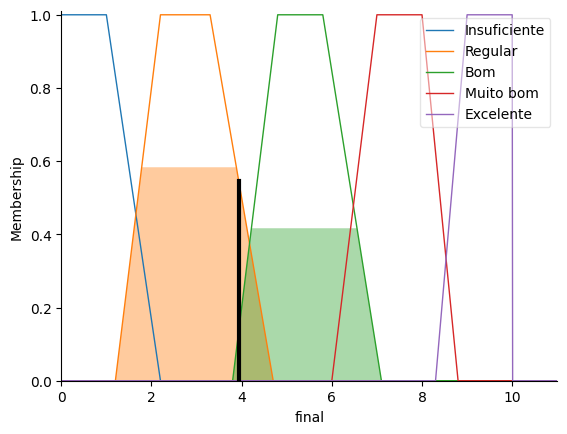

In [ ]:
def results(nota1, nota2, nota3):
  return (nota1 + nota2 + nota3)/3

# Passar entradas ao sistema por meio dos rótulos antecedentes
grades.input['test'] = 2.1
grades.input['extraClass'] = 2.5
grades.input['classAtv'] = 4

results = results(2.1, 4, 2.5)

# Computar a saída
grades.compute()

# Imprimir a saída e visualizar região agregada
print('\nIndice fuzzy: ', grades.output['final'])
print('\nIndice clássico: ', results)
final.view(sim=grades)